In [1]:
import nltk
import re
import string
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

## Read Data

In [2]:
# This data set is downloaded from Kaggle
alexa_df = pd.read_csv('data/amazon_alexa.tsv', sep='\t')

In [3]:
alexa_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
alexa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [5]:
alexa_df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

### There are 3150 entries and 5 columns . The variation column is categorical field and there is a date column as well.

### Let's convert the categorical value using one hot encoding

In [6]:
df1 = pd.get_dummies(alexa_df['variation'])
df2 = alexa_df.drop(columns=['variation'])
df = pd.concat([df2,df1], axis=1)

In [7]:
df.columns

Index(['rating', 'date', 'verified_reviews', 'feedback', 'Black', 'Black  Dot',
       'Black  Plus', 'Black  Show', 'Black  Spot', 'Charcoal Fabric ',
       'Configuration: Fire TV Stick', 'Heather Gray Fabric ', 'Oak Finish ',
       'Sandstone Fabric ', 'Walnut Finish ', 'White', 'White  Dot',
       'White  Plus', 'White  Show', 'White  Spot'],
      dtype='object')

## Extract day, month from date. Drop year as the data has only one year 2018. 

In [8]:
df['date'].head()

0    31-Jul-18
1    31-Jul-18
2    31-Jul-18
3    31-Jul-18
4    31-Jul-18
Name: date, dtype: object

In [9]:
df['Day'] = pd.DatetimeIndex(df['date']).day
df['Month'] = pd.DatetimeIndex(df['date']).month

In [10]:
df.columns

Index(['rating', 'date', 'verified_reviews', 'feedback', 'Black', 'Black  Dot',
       'Black  Plus', 'Black  Show', 'Black  Spot', 'Charcoal Fabric ',
       'Configuration: Fire TV Stick', 'Heather Gray Fabric ', 'Oak Finish ',
       'Sandstone Fabric ', 'Walnut Finish ', 'White', 'White  Dot',
       'White  Plus', 'White  Show', 'White  Spot', 'Day', 'Month'],
      dtype='object')

In [11]:
#Drop the original column
df.drop(columns='date', inplace=True)

In [12]:
df.head()

,rating,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,...,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,Day,Month
0,5,Love my Echo!,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,31,7
1,5,Loved it!,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,31,7
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,31,7
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,31,7
4,5,Music,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,31,7


## Add new Features such as character count, word cound, no.of punctuations, no.of stop words etc

In [13]:
df['char_count'] = df['verified_reviews'].apply(lambda x: len(x) - x.count(" "))


In [14]:
# Define a function to count the number of words
def word_count(text):
    count = sum(1 for word in text.split(" "))
    return count

In [15]:
df['word_count'] = df['verified_reviews'].apply(lambda x: word_count(x))

In [16]:
# Define a function for counting punction
def punct_count(text):
    count = sum(1 for p in text if p in string.punctuation)
    return count

In [17]:
df['punct_count'] = df['verified_reviews'].apply(lambda x: punct_count(x))

In [18]:
# Define a function for counting punction
stopwords = nltk.corpus.stopwords.words('english')
def stopwords_count(text):
    count = sum(1 for p in text.split() if p in stopwords)
    return count

In [19]:
df['stopwords_count'] = df['verified_reviews'].apply(lambda x: stopwords_count(x))

In [20]:
df.head()

,rating,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,...,White Dot,White Plus,White Show,White Spot,Day,Month,char_count,word_count,punct_count,stopwords_count
0,5,Love my Echo!,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,11,3,1,1
1,5,Loved it!,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,8,2,1,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,...,0,0,0,0,31,7,157,39,3,19
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,139,34,4,12
4,5,Music,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,5,1,0,0


In [21]:
df[['word_count','punct_count', 'char_count', 'stopwords_count']].describe()

,word_count,punct_count,char_count,stopwords_count
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,25.748254,3.887937,107.301270,10.189524
std,35.101628,5.762348,147.149252,15.342288
min,1.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,25.000000,1.000000
50%,14.000000,2.000000,61.000000,5.000000
75%,32.000000,5.000000,134.000000,13.000000
max,526.000000,121.000000,2326.000000,223.000000


### Findings: There are reviews with one word as well are 526 words!! 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017118441BA8>,
      dtype=object)

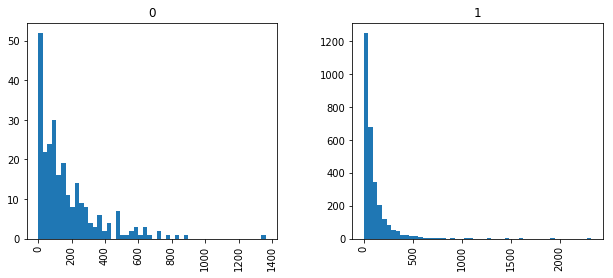

In [23]:
df.hist(column='char_count', by='feedback', bins=50,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017118C32390>,
      dtype=object)

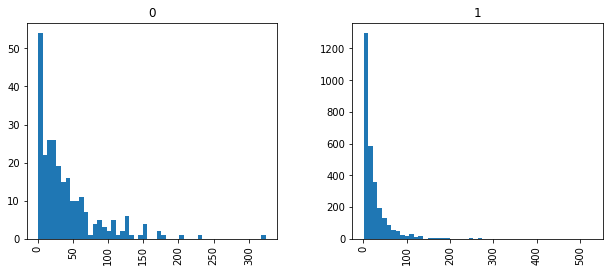

In [24]:
df.hist(column='word_count', by='feedback', bins=50,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017118E09B38>,
      dtype=object)

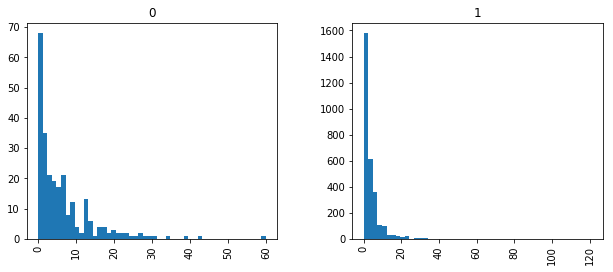

In [25]:
df.hist(column='punct_count', by='feedback', bins=50,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017118F86C18>,
      dtype=object)

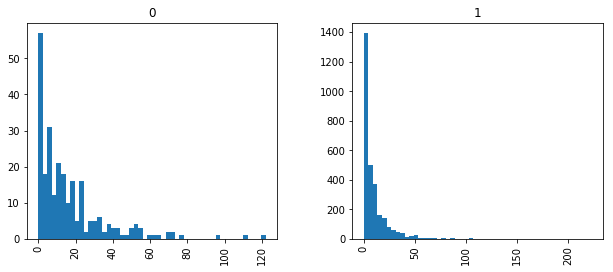

In [26]:
df.hist(column='stopwords_count', by='feedback', bins=50,figsize=(10,4))

In [27]:
# Standardize the new numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['word_count','punct_count', 'char_count', 'stopwords_count']
for col in columns:
    df[[col]] = scaler.fit_transform(df[[col]])
df.head()

,rating,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,...,White Dot,White Plus,White Show,White Spot,Day,Month,char_count,word_count,punct_count,stopwords_count
0,5,Love my Echo!,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.004729,0.003810,0.008264,0.004484
1,5,Loved it!,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.003439,0.001905,0.008264,0.000000
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,...,0,0,0,0,31,7,0.067498,0.072381,0.024793,0.085202
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.059759,0.062857,0.033058,0.053812
4,5,Music,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.002150,0.000000,0.000000,0.000000


## Let's check  the word frequency distribution

In [28]:
from nltk.tokenize import word_tokenize
reviews = df.verified_reviews.str.cat(sep =' ')
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist, key = frequency_dist.get, reverse=True)[0:50]

5289


['.',
 'I',
 'the',
 'to',
 'it',
 'and',
 ',',
 'a',
 '!',
 'my',
 'is',
 'for',
 'with',
 'of',
 'have',
 'that',
 'this',
 'in',
 'but',
 'Alexa',
 'on',
 'love',
 'Echo',
 '’',
 'music',
 'great',
 'can',
 'not',
 'you',
 'as',
 'It',
 'like',
 'up',
 'use',
 'so',
 'was',
 "n't",
 'Love',
 'The',
 'do',
 'be',
 'one',
 'all',
 'echo',
 'more',
 'sound',
 "'s",
 'set',
 'me',
 'just']

## Cleaning the text and create document term matrix

In [29]:
ps = nltk.PorterStemmer()

In [30]:
#Define a function to clean the text
# lower case, split to tokens and remove stop words, and do stemming
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])    
    text = re.sub('\w*\d\w*', '', text)
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


In [31]:

alexa_df['cleaned_text'] = alexa_df['verified_reviews'].apply(lambda x: clean_text(x))

In [32]:
# Create new vocabulary using the cleaned text
reviews = df.verified_reviews.str.cat(sep =' ')
tokens = clean_text(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted_freq_list = sorted(frequency_dist, key = frequency_dist.get, reverse=True)
sorted_freq_list[-5:-1]

3114


['semi', 'factori', 'abd', 'supereasi']

In [33]:
sorted_freq_list.index('worst')

1516

In [34]:
sorted_freq_list.index('awesom')

102

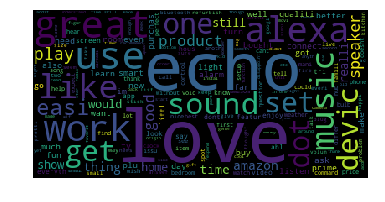

In [35]:
from wordcloud import WordCloud
wordcloud =WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Create the Document term matrix using count vectorizer

In [36]:
count_vec = CountVectorizer(analyzer=clean_text)
count_vec_df = count_vec.fit_transform(df['verified_reviews'])

In [37]:
count_vec.get_feature_names()

['',
 'abay',
 'abc',
 'abd',
 'abil',
 'abl',
 'abod',
 'absolut',
 'absolutli',
 'ac',
 'accent',
 'accentth',
 'accept',
 'access',
 'accessne',
 'accessori',
 'accesss',
 'accessto',
 'accid',
 'accident',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'account',
 'accur',
 'accuraci',
 'accustom',
 'acknowledg',
 'acoust',
 'across',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'addict',
 'addit',
 'addon',
 'address',
 'adept',
 'adequ',
 'adjac',
 'adjust',
 'admit',
 'ador',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'advic',
 'advis',
 'aesthet',
 'af',
 'affirm',
 'affirmcom',
 'afford',
 'afraid',
 'afternoon',
 'afterward',
 'againi',
 'againthi',
 'age',
 'agent',
 'ago',
 'agoyesterday',
 'agre',
 'agreement',
 'ahead',
 'ai',
 'aid',
 'aint',
 'air',
 'aka',
 'al',
 'alabama',
 'alarm',
 'alarmb',
 'alarmcom',
 'alarmthi',
 'albeit',
 'alcohol',
 'alert',
 'alex',
 'alexa',
 'alexaalso',
 'alexaechocomput',
 'alexathi',
 'alexi',
 'ale

In [38]:
X = pd.DataFrame(count_vec_df.toarray(), columns=count_vec.get_feature_names())

In [39]:
X.head()

,,abay,abc,abd,abil,abl,abod,absolut,absolutli,ac,...,yup,z,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,í,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = []
for col in columns:
    df[[col]] = scaler.fit_transform(df[[col]])
df.head()

,rating,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,...,White Dot,White Plus,White Show,White Spot,Day,Month,char_count,word_count,punct_count,stopwords_count
0,5,Love my Echo!,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.004729,0.003810,0.008264,0.004484
1,5,Loved it!,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.003439,0.001905,0.008264,0.000000
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,...,0,0,0,0,31,7,0.067498,0.072381,0.024793,0.085202
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.059759,0.062857,0.033058,0.053812
4,5,Music,1,0,0,0,0,0,1,0,...,0,0,0,0,31,7,0.002150,0.000000,0.000000,0.000000


In [41]:
len(df.columns)

25

## Set X and Y 


In [42]:
Y = df['feedback']

In [43]:
X_features = df.drop(columns=['verified_reviews', 'feedback', 'rating'], axis=1)

In [44]:
len(X_features.columns), len(X.columns)

(22, 3115)

In [45]:
X_features.columns

Index(['Black', 'Black  Dot', 'Black  Plus', 'Black  Show', 'Black  Spot',
       'Charcoal Fabric ', 'Configuration: Fire TV Stick',
       'Heather Gray Fabric ', 'Oak Finish ', 'Sandstone Fabric ',
       'Walnut Finish ', 'White', 'White  Dot', 'White  Plus', 'White  Show',
       'White  Spot', 'Day', 'Month', 'char_count', 'word_count',
       'punct_count', 'stopwords_count'],
      dtype='object')

### Concat the document term matrix with other feature data set 

In [46]:
X_features = pd.concat([X_features, X], axis=1)

In [47]:
len(X_features.columns)

3137

In [48]:
X_features.head(5)

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,yup,z,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,í,útil
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Columns: 3137 entries, Black to útil
dtypes: float64(4), int64(3117), uint8(16)
memory usage: 75.1 MB


In [50]:
feature_list = X_features.columns

## Split the data set to train and test

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, scorer

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_features, Y, test_size=0.2)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2520, 3137), (630, 3137), (2520,), (630,))

## Build Classification Model using Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(n_estimators=100, max_depth=50)

In [56]:
rf_model = rf.fit(X_train, y_train)

In [57]:
y_pred = rf_model.predict(X_test)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
print(cm)

[[  5  45]
 [  0 580]]


In [60]:
round((y_pred==y_test).sum()/len(y_pred), 3)

0.929

In [61]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred, pos_label = 1, average='binary')

In [62]:
print('Precision: {} \t Recall: {} \nFscore: {} \t Support: {} \nAccuracy: {}'.format(precision, recall, fscore,
                                                                                        support, round((y_pred==y_test).sum()/len(y_pred), 3) ))

Precision: 0.928 	 Recall: 1.0 
Fscore: 0.9626556016597512 	 Support: None 
Accuracy: 0.929


## The Random Model has classified the review sentiment/feedback with 92% Accuracy and 95% F1-Score

## Find the Important Features

In [63]:
feature_imp_df = pd.DataFrame({'feature' : feature_list,
                              'importance': rf_model.feature_importances_})

In [64]:
feature_imp_df.sort_values('importance', ascending=False)[0:15]

,feature,importance
16,Day,0.021956
2279,return,0.019794
18,char_count,0.018258
21,stopwords_count,0.013752
19,word_count,0.012282
2733,terribl,0.012262
20,punct_count,0.011929
253,back,0.011650
2625,stop,0.010886
1620,love,0.009291
